In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rcParams['figure.figsize']=15,6


ds = pd.read_csv('AirPassengers.csv')
ds.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
ds.dtypes

Month          object
#Passengers     int64
dtype: object

In [3]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [4]:
ds.shape

(144, 2)

In [10]:
# CONVERTING Month from object/string to date datatype
from datetime import datetime
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
ds = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
ds.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
# INDEXING ARRAY
ds['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


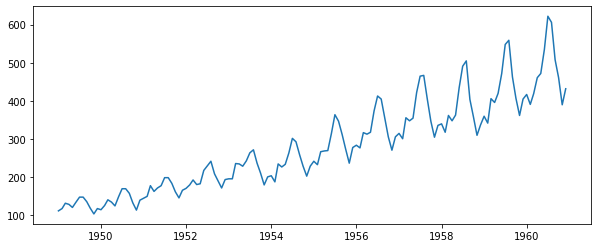

In [13]:
# CHECKING FOR STAIONARITY
# PLOT THE TIME SERIES
plt.figure(figsize=(10,4))
plt.plot(ds)

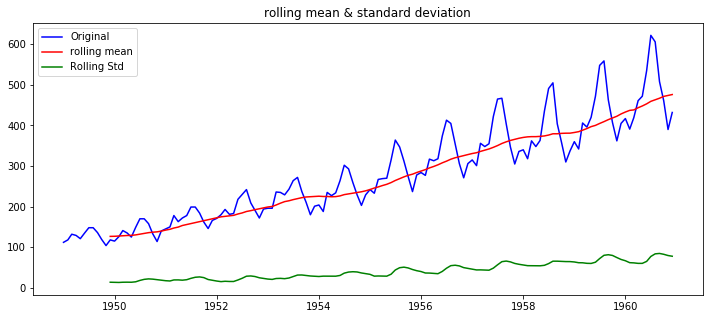

Results of Dicky Fuller Test:
Test statistic            0.815369
p-value                   0.991880
#Lags Used               13.000000
NO. of observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [14]:
# FUNCTION FOR TESTING STATIONARITY
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean= timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean= plt.plot(rolmean, color='red',label='rolling mean')
    std = plt.plot(rolstd, color='green',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('rolling mean & standard deviation')
    plt.show(block=False)
    
    print("Results of Dicky Fuller Test:")
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags Used','NO. of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]= value
    print(dfoutput)
    
test_stationarity(ds)

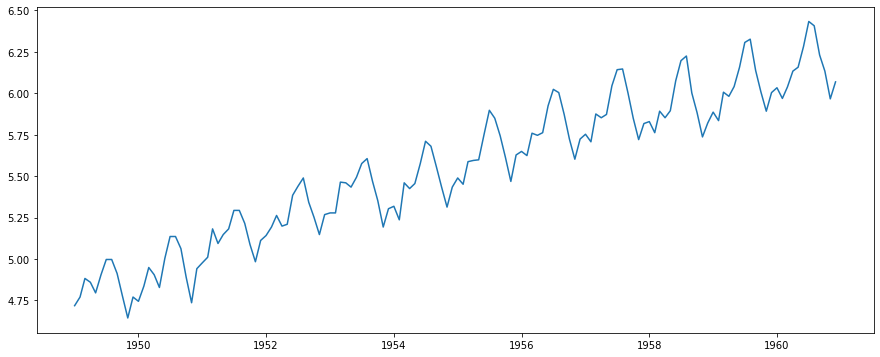

In [15]:
# MAKING DS STATIONARY
# ESTIMATING AND ELIMINATING THE TREND
ds_log = np.log(ds)
plt.plot(ds_log)

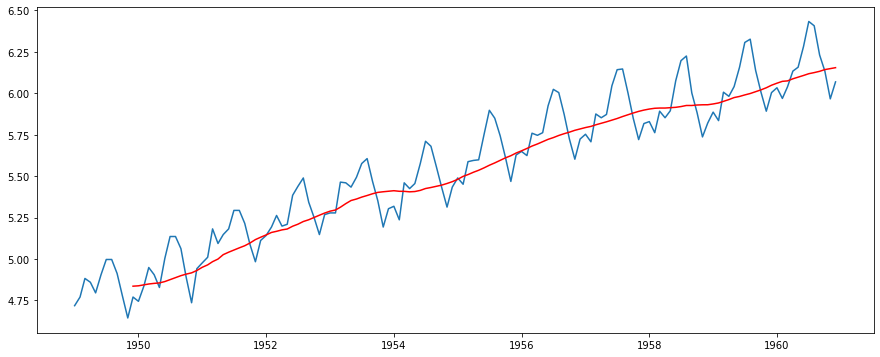

In [16]:
# SMOOTHING
# MOVING AVERAGE

moving_avg = ds_log.rolling(window=12).mean()
plt.plot(ds_log)
plt.plot(moving_avg, color='red')

In [17]:
ds_log_moving_avd_diff = ds_log - moving_avg
ds_log_moving_avd_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [18]:
ds_log_moving_avd_diff.dropna(inplace=True)
ds_log_moving_avd_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


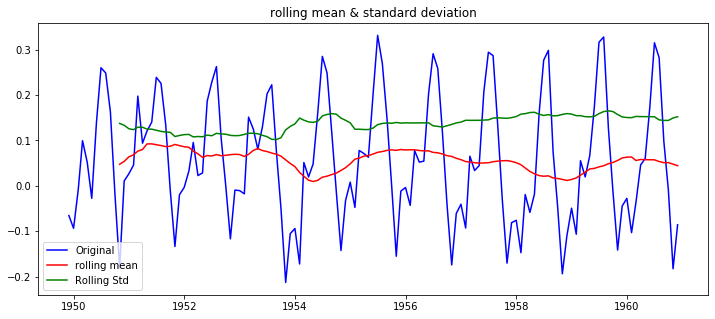

Results of Dicky Fuller Test:
Test statistic           -3.162908
p-value                   0.022235
#Lags Used               13.000000
NO. of observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [19]:
test_stationarity(ds_log_moving_avd_diff)

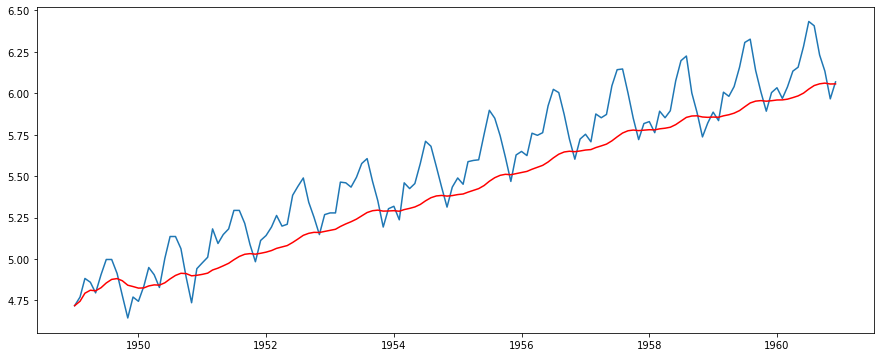

In [20]:
# EXPONENTRIALLY WEIGHTED MOVING AVERAGE

expweighted_avg = ds_log.ewm(halflife=12).mean()
plt.plot(ds_log)
plt.plot(expweighted_avg,color='red')

In [21]:
expweighted_avg,ds_log,ds_log_moving_avd_diff

(            #Passengers
 Month                  
 1949-01-01     4.718499
 1949-02-01     4.745345
 1949-03-01     4.793835
 1949-04-01     4.811785
 1949-05-01     4.808206
 ...                 ...
 1960-08-01     6.046445
 1960-09-01     6.056778
 1960-10-01     6.061079
 1960-11-01     6.055750
 1960-12-01     6.056461
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01     4.718499
 1949-02-01     4.770685
 1949-03-01     4.882802
 1949-04-01     4.859812
 1949-05-01     4.795791
 ...                 ...
 1960-08-01     6.406880
 1960-09-01     6.230481
 1960-10-01     6.133398
 1960-11-01     5.966147
 1960-12-01     6.068426
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-12-01    -0.065494
 1950-01-01    -0.093449
 1950-02-01    -0.007566
 1950-03-01     0.099416
 1950-04-01     0.052142
 ...                 ...
 1960-08-01     0.282363
 1960-09-01     0.098235
 1960-10-01    -0.009230
 1960-11-01    -0.182

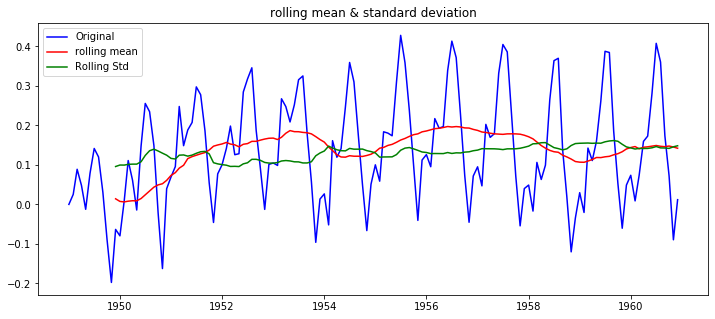

Results of Dicky Fuller Test:
Test statistic           -3.601262
p-value                   0.005737
#Lags Used               13.000000
NO. of observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [23]:
ds_log_ewma_diff = ds_log-expweighted_avg
test_stationarity(ds_log_ewma_diff)

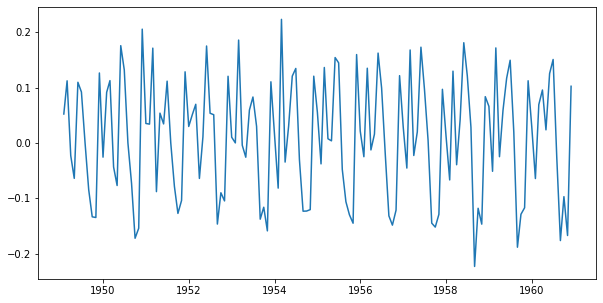

In [25]:
# ELIMINATING TREND AND SEASONALITY
# DIFFERENCING

plt.figure(figsize=(10,5))
ds_log_diff = ds_log-ds_log.shift()
plt.plot(ds_log_diff)

In [26]:
ds_log.shift(),ds_log

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01     4.718499
 1949-03-01     4.770685
 1949-04-01     4.882802
 1949-05-01     4.859812
 ...                 ...
 1960-08-01     6.432940
 1960-09-01     6.406880
 1960-10-01     6.230481
 1960-11-01     6.133398
 1960-12-01     5.966147
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01     4.718499
 1949-02-01     4.770685
 1949-03-01     4.882802
 1949-04-01     4.859812
 1949-05-01     4.795791
 ...                 ...
 1960-08-01     6.406880
 1960-09-01     6.230481
 1960-10-01     6.133398
 1960-11-01     5.966147
 1960-12-01     6.068426
 
 [144 rows x 1 columns])

<Figure size 864x432 with 0 Axes>

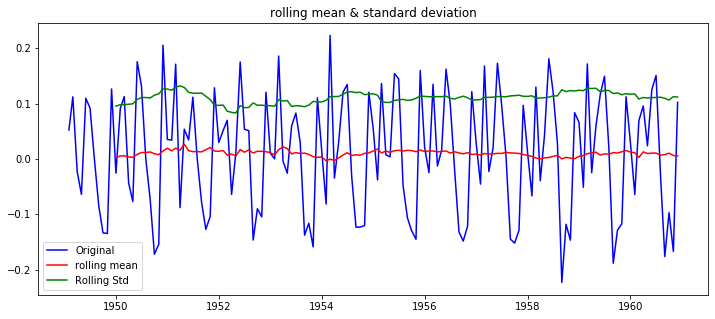

Results of Dicky Fuller Test:
Test statistic           -2.717131
p-value                   0.071121
#Lags Used               14.000000
NO. of observations     128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [27]:
plt.figure(figsize=(12,6))
ds_log_diff.dropna(inplace=True)
test_stationarity(ds_log_diff)

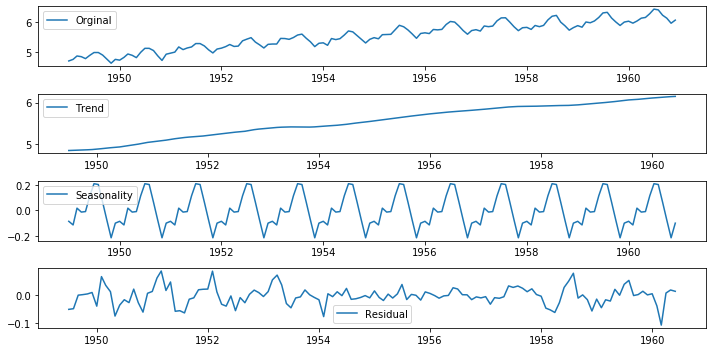

In [28]:
# DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ds_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ds_log,label='Orginal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

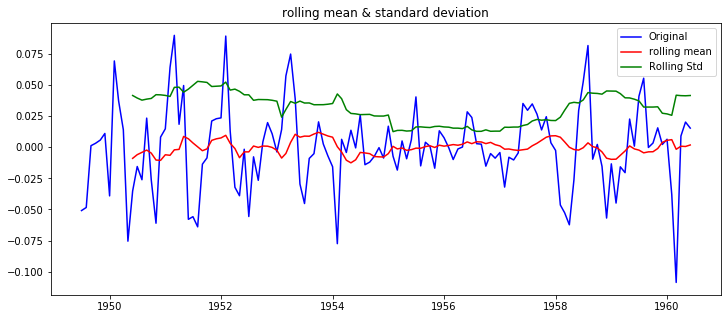

Results of Dicky Fuller Test:
Test statistic         -6.332387e+00
p-value                 2.885059e-08
#Lags Used              9.000000e+00
NO. of observations     1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [29]:
plt.figure(figsize=(12,5))
ds_log_decomp = residual
ds_log_decomp.dropna(inplace = True)
test_stationarity(ds_log_decomp)

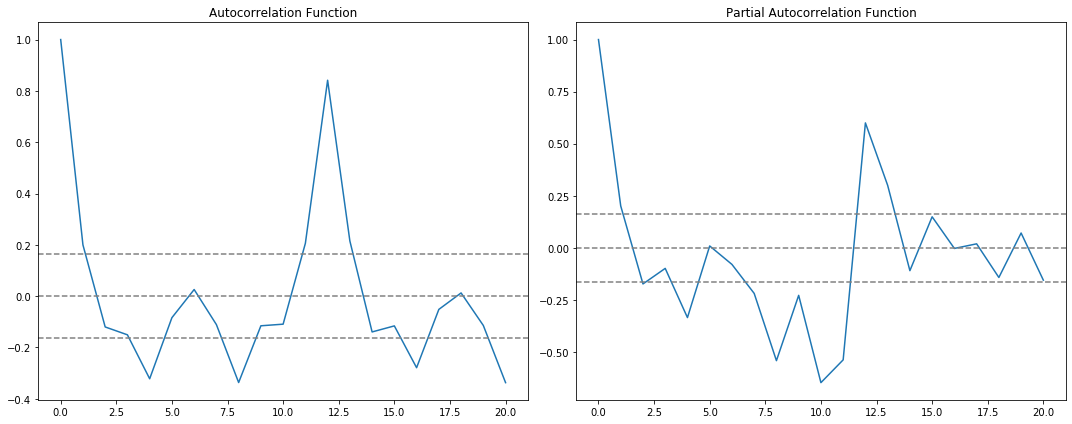

In [34]:
# FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

# ACF AND PACF PLOTS

from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ds_log_diff,nlags=20)
lag_pacf = pacf(ds_log_diff, nlags=20,method='ols')

#Plot ACF:  
#plt.figure(figsize=(10,5))
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

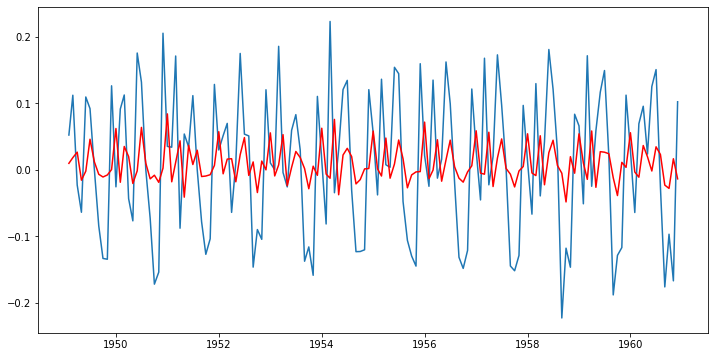

In [38]:
# AR MODEL:
model = ARIMA(ds_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ds_log_diff) 
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ds_log_diff)**2))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

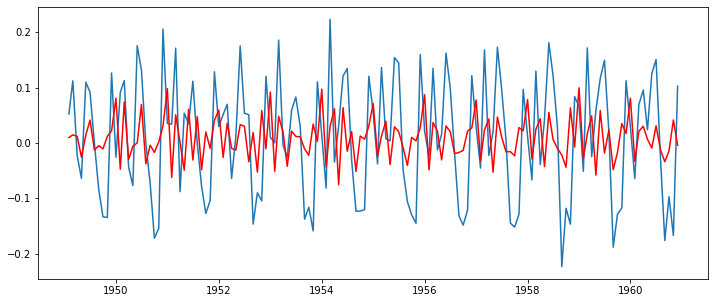

In [41]:
# MA MODEL
model = ARIMA(ds_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ds_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ds_log_diff)**2))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

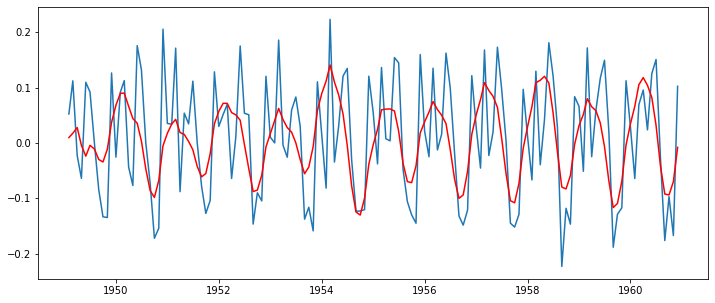

In [42]:
# ARIMA MODEL
model = ARIMA(ds_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ds_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))

In [43]:
# CONVERTING TO ORIGINAL SCALE
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [45]:
predictions_ARIMA_log = pd.Series(ds_log.iloc[0], index=ds_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01         NaN
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
dtype: float64

In [46]:
predictions_ARIMA_log.head(10)

Month
1949-01-01         NaN
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
dtype: float64

In [47]:
ds_log.head(10)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


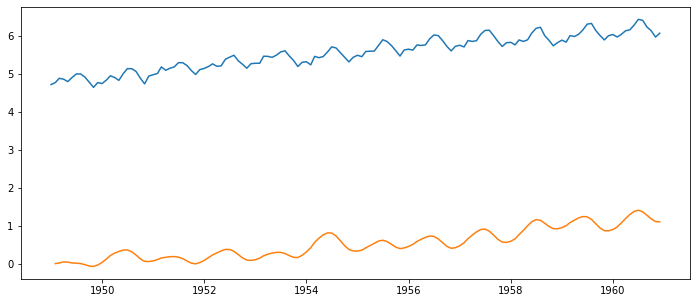

In [48]:
plt.figure(figsize=(12,5))
plt.plot(ds_log)
plt.plot(predictions_ARIMA_log)

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

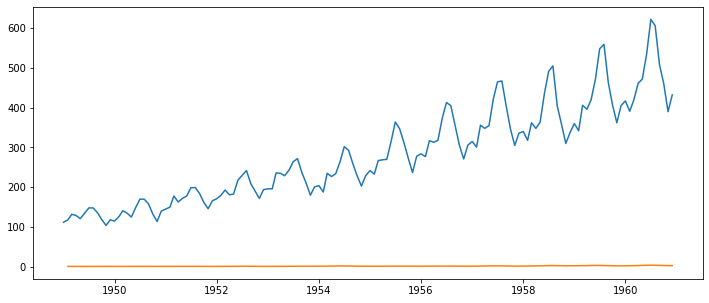

In [49]:

predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ds)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ds)**2)/len(ds)))

In [50]:
predictions_ARIMA

Month
1949-01-01         NaN
1949-02-01    1.009626
1949-03-01    1.027441
1949-04-01    1.056268
1949-05-01    1.051503
                ...   
1960-08-01    3.945415
1960-09-01    3.597375
1960-10-01    3.274585
1960-11-01    3.053436
1960-12-01    3.028722
Length: 144, dtype: float64

In [51]:
ds

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


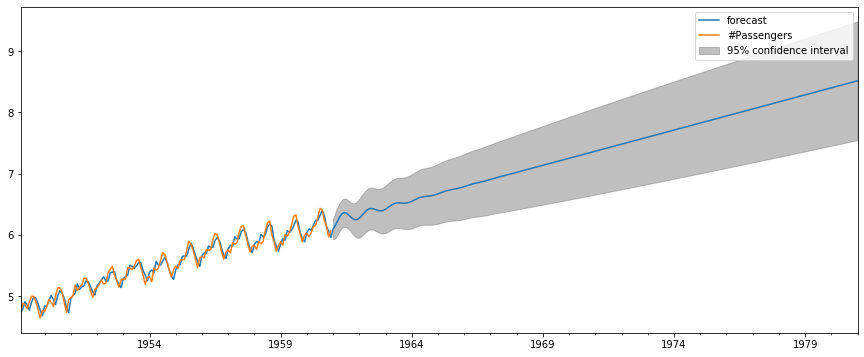

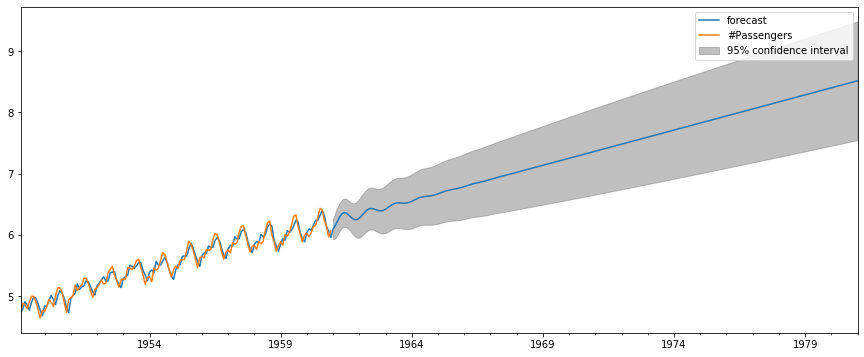

In [53]:
results_ARIMA.plot_predict(1,384)

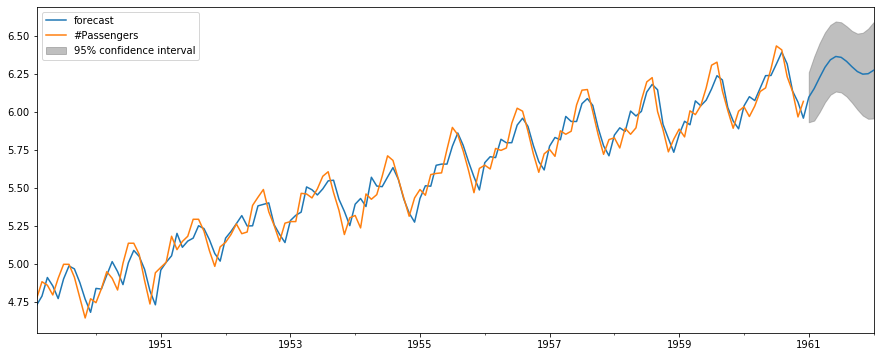

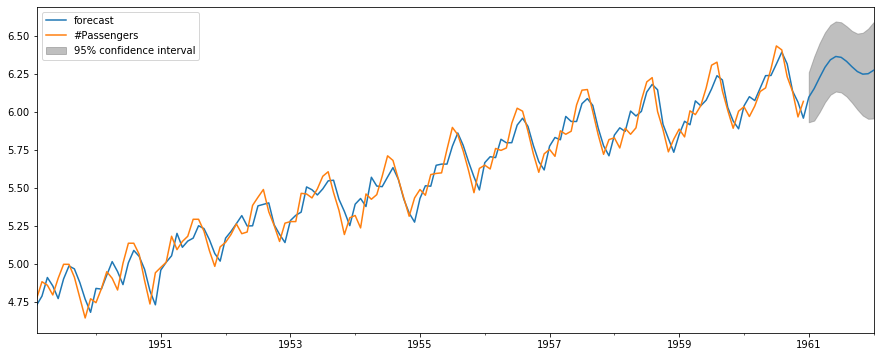

In [54]:
results_ARIMA.plot_predict(1,156)

In [55]:
x=results_ARIMA.forecast(steps=156)
x

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91